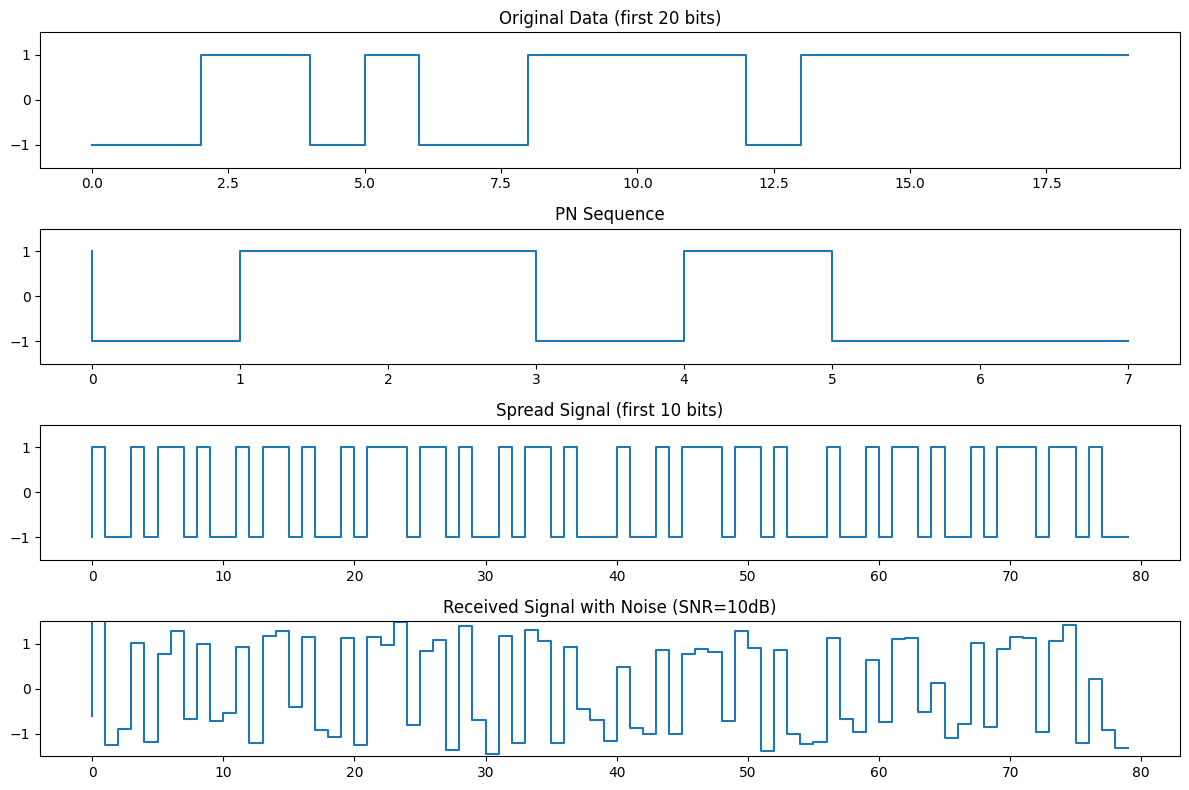

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class DSSSSystem:
    def __init__(self, n_bits=100, chips_per_bit=8):
        self.n_bits = n_bits
        self.chips_per_bit = chips_per_bit
        self.sample_rate = 8  # samples per chip

    def generate_pn_sequence(self):
        """Generate PN sequence using maximal length sequence"""
        return np.random.choice([1, -1], self.chips_per_bit)

    def spread_signal(self, data, pn_sequence):
        spread_data = np.zeros(len(data) * self.chips_per_bit)
        for i in range(len(data)):
            spread_data[i*self.chips_per_bit:(i+1)*self.chips_per_bit] = data[i] * pn_sequence
        return spread_data

    def simulate(self, SNR_dB=10):
        # Generate random data
        data = np.random.choice([1, -1], self.n_bits)

        # Generate PN sequence
        pn_sequence = self.generate_pn_sequence()

        # Spread the signal
        spread_signal = self.spread_signal(data, pn_sequence)

        # Add noise
        SNR = 10**(SNR_dB/10)
        noise_power = 1/SNR
        noise = np.random.normal(0, np.sqrt(noise_power), len(spread_signal))
        received_signal = spread_signal + noise

        # Plot results
        plt.figure(figsize=(12, 8))

        # Original data
        plt.subplot(411)
        plt.step(np.arange(20), data[:20])
        plt.title('Original Data (first 20 bits)')
        plt.ylim(-1.5, 1.5)

        # PN sequence
        plt.subplot(412)
        plt.step(np.arange(len(pn_sequence)), pn_sequence)
        plt.title('PN Sequence')
        plt.ylim(-1.5, 1.5)

        # Spread signal
        plt.subplot(413)
        plt.step(np.arange(80), spread_signal[:80])
        plt.title('Spread Signal (first 10 bits)')
        plt.ylim(-1.5, 1.5)

        # Received signal with noise
        plt.subplot(414)
        plt.step(np.arange(80), received_signal[:80])
        plt.title(f'Received Signal with Noise (SNR={SNR_dB}dB)')
        plt.ylim(-1.5, 1.5)

        plt.tight_layout()
        plt.show()

        return data, spread_signal, received_signal

# Simulate DSSS
dsss = DSSSSystem()
data, spread_signal, received_signal = dsss.simulate(SNR_dB=10)

## PN

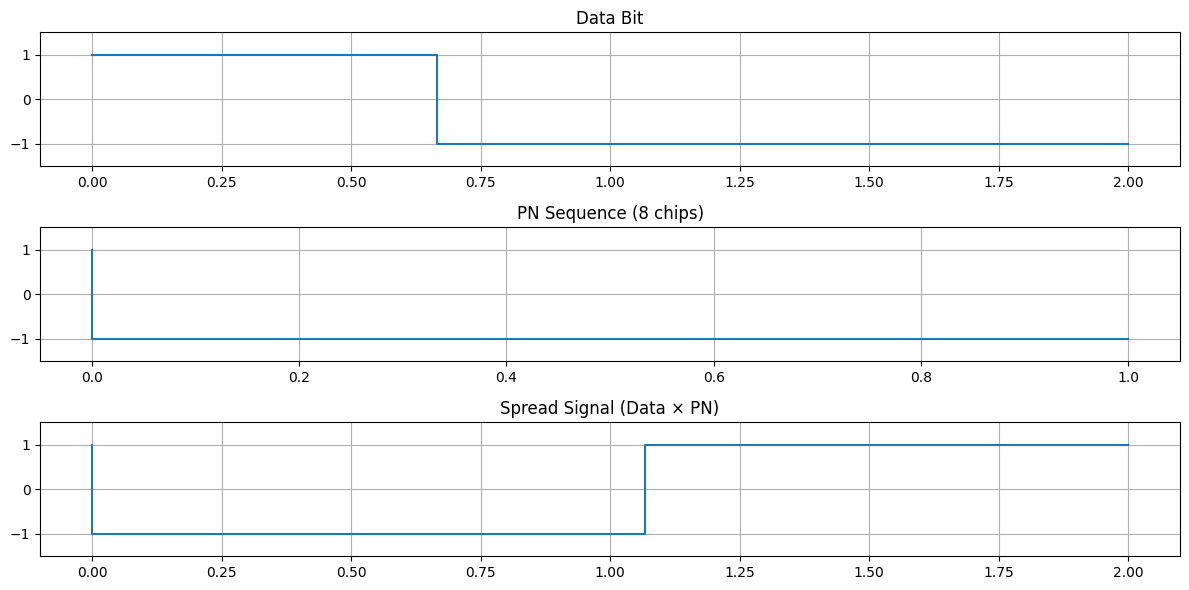

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_dsss_multiplication():
    # Parameters
    chips_per_bit = 8
    n_bits = 2

    # Generate data and PN sequence
    data = np.array([1, -1])  # Two bits
    pn_sequence = np.random.choice([1, -1], chips_per_bit)

    # Spread the signal
    spread_signal = np.zeros(n_bits * chips_per_bit)
    for i in range(n_bits):
        spread_signal[i*chips_per_bit:(i+1)*chips_per_bit] = data[i] * pn_sequence

    # Plotting
    t_bits = np.linspace(0, n_bits, n_bits*2)
    t_chips = np.linspace(0, n_bits, n_bits*chips_per_bit)

    plt.figure(figsize=(12, 6))

    plt.subplot(311)
    plt.step(t_bits, np.repeat(data, 2))
    plt.title('Data Bit')
    plt.ylim(-1.5, 1.5)
    plt.grid(True)

    plt.subplot(312)
    plt.step(np.linspace(0, 1, chips_per_bit), pn_sequence)
    plt.title(f'PN Sequence ({chips_per_bit} chips)')
    plt.ylim(-1.5, 1.5)
    plt.grid(True)

    plt.subplot(313)
    plt.step(t_chips, spread_signal)
    plt.title('Spread Signal (Data × PN)')
    plt.ylim(-1.5, 1.5)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

visualize_dsss_multiplication()

## Simulation transmition

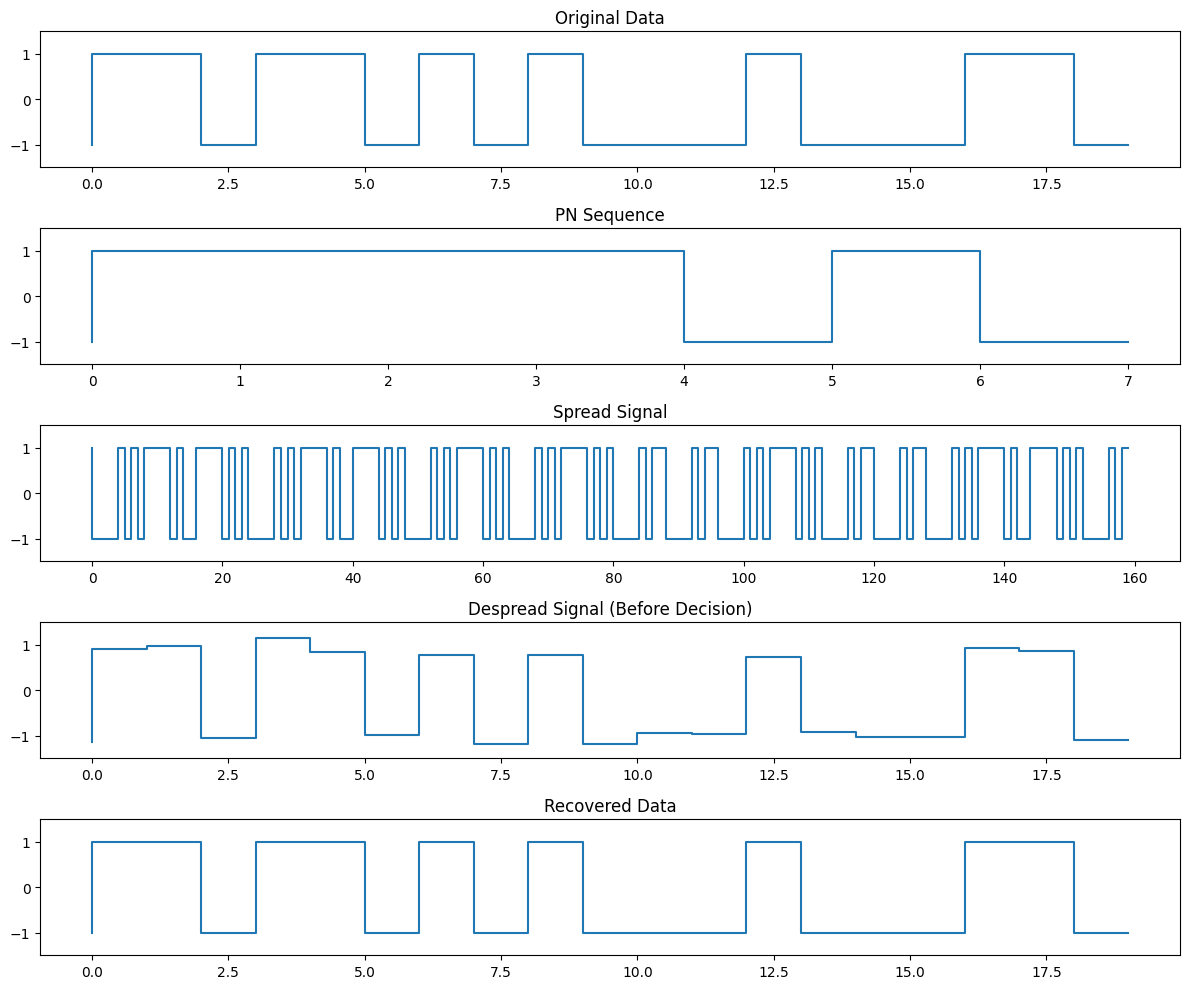

BER at 5dB SNR: 0.000


In [3]:
import numpy as np
import matplotlib.pyplot as plt

class DSSSTransceiver:
    def __init__(self, n_bits=100, chips_per_bit=8):
        self.n_bits = n_bits
        self.chips_per_bit = chips_per_bit
        self.pn_sequence = np.random.choice([1, -1], chips_per_bit)

    def transmit(self, data):
        spread_signal = np.zeros(len(data) * self.chips_per_bit)
        for i in range(len(data)):
            spread_signal[i*self.chips_per_bit:(i+1)*self.chips_per_bit] = data[i] * self.pn_sequence
        return spread_signal

    def receive(self, received_signal):
        # Despreading using same PN sequence
        despread_signal = np.zeros(self.n_bits)
        for i in range(self.n_bits):
            chip_segment = received_signal[i*self.chips_per_bit:(i+1)*self.chips_per_bit]
            # Correlate with PN sequence and decide bit
            despread_signal[i] = np.sum(chip_segment * self.pn_sequence) / self.chips_per_bit

        # Decision threshold
        recovered_data = np.sign(despread_signal)
        return recovered_data, despread_signal

def simulate_system(SNR_dB):
    # Initialize system
    dsss = DSSSTransceiver(n_bits=20)

    # Generate and transmit data
    data = np.random.choice([1, -1], dsss.n_bits)
    spread_signal = dsss.transmit(data)

    # Add noise
    SNR = 10**(SNR_dB/10)
    noise_power = 1/SNR
    noise = np.random.normal(0, np.sqrt(noise_power), len(spread_signal))
    received_signal = spread_signal + noise

    # Receive and recover data
    recovered_data, despread_signal = dsss.receive(received_signal)

    # Plot results
    plt.figure(figsize=(12, 10))

    plt.subplot(511)
    plt.step(np.arange(len(data)), data)
    plt.title('Original Data')
    plt.ylim(-1.5, 1.5)

    plt.subplot(512)
    plt.step(np.arange(len(dsss.pn_sequence)), dsss.pn_sequence)
    plt.title('PN Sequence')
    plt.ylim(-1.5, 1.5)

    plt.subplot(513)
    plt.step(np.arange(len(spread_signal)), spread_signal)
    plt.title('Spread Signal')
    plt.ylim(-1.5, 1.5)

    plt.subplot(514)
    plt.step(np.arange(len(despread_signal)), despread_signal)
    plt.title('Despread Signal (Before Decision)')
    plt.ylim(-1.5, 1.5)

    plt.subplot(515)
    plt.step(np.arange(len(recovered_data)), recovered_data)
    plt.title('Recovered Data')
    plt.ylim(-1.5, 1.5)

    plt.tight_layout()
    plt.show()

    # Calculate BER
    errors = np.sum(data != recovered_data)
    ber = errors/len(data)
    print(f"BER at {SNR_dB}dB SNR: {ber:.3f}")

simulate_system(SNR_dB=5)

## Interference

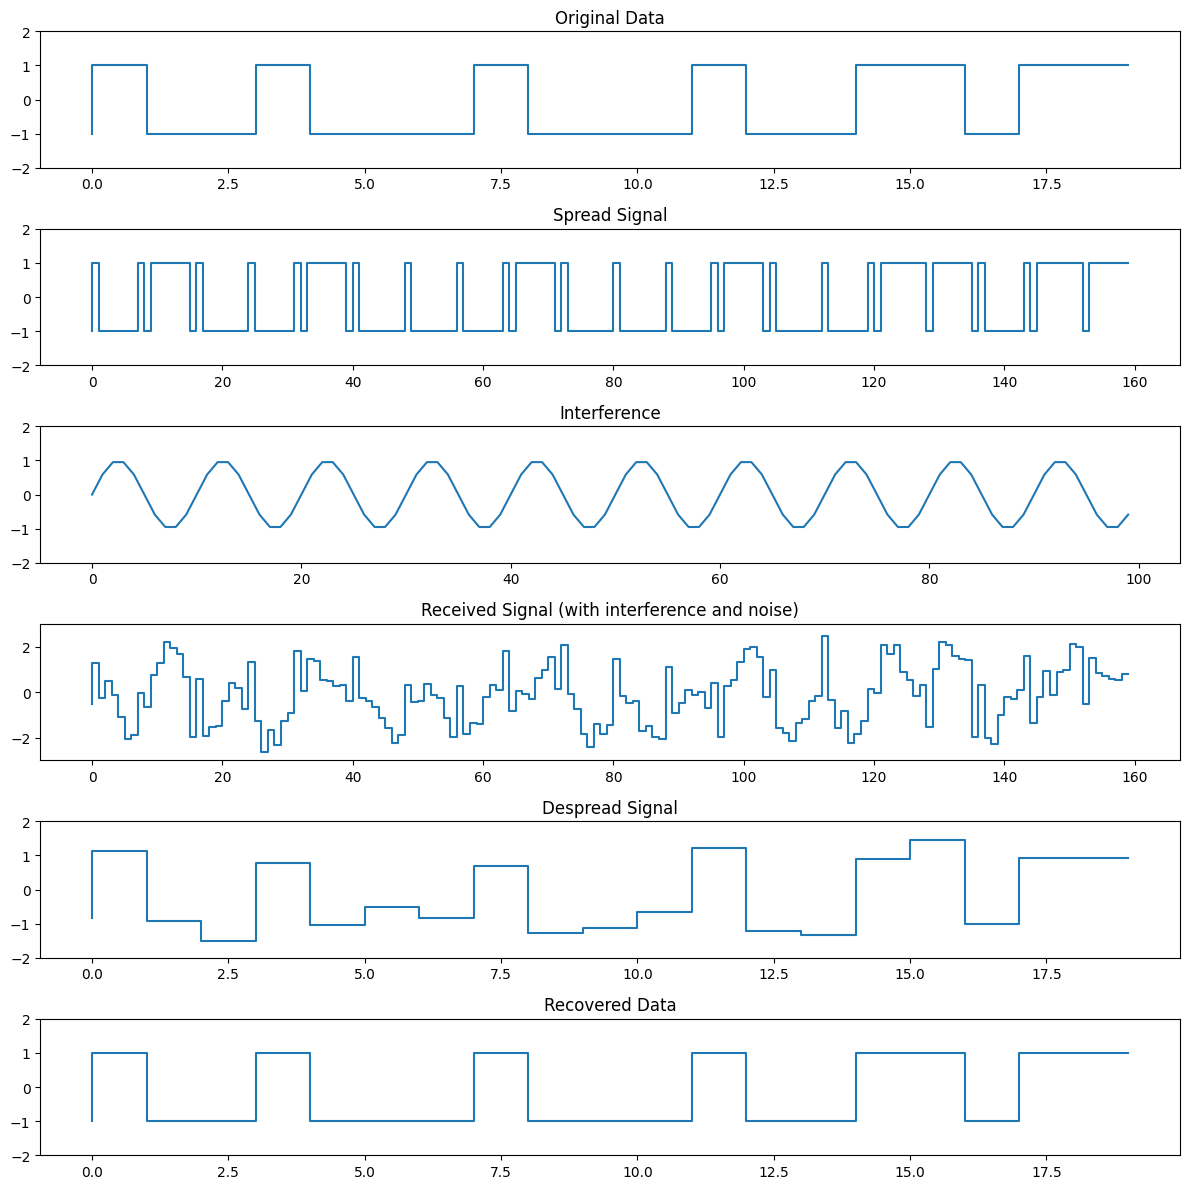

BER at SNR=10dB, SIR=0dB: 0.000


In [4]:
import numpy as np
import matplotlib.pyplot as plt

class DSSSTransceiver:
    def __init__(self, n_bits=100, chips_per_bit=8):
        self.n_bits = n_bits
        self.chips_per_bit = chips_per_bit
        self.pn_sequence = np.random.choice([1, -1], chips_per_bit)

    def transmit(self, data):
        spread_signal = np.zeros(len(data) * self.chips_per_bit)
        for i in range(len(data)):
            spread_signal[i*self.chips_per_bit:(i+1)*self.chips_per_bit] = data[i] * self.pn_sequence
        return spread_signal

    def receive(self, received_signal):
        despread_signal = np.zeros(self.n_bits)
        for i in range(self.n_bits):
            chip_segment = received_signal[i*self.chips_per_bit:(i+1)*self.chips_per_bit]
            despread_signal[i] = np.sum(chip_segment * self.pn_sequence) / self.chips_per_bit
        return np.sign(despread_signal), despread_signal

def simulate_with_interference(SNR_dB, SIR_dB):
    dsss = DSSSTransceiver(n_bits=20)

    # Generate signals
    data = np.random.choice([1, -1], dsss.n_bits)
    spread_signal = dsss.transmit(data)

    # Generate interference (narrowband)
    t = np.arange(len(spread_signal))
    interference_freq = 0.1  # Normalized frequency
    SIR = 10**(SIR_dB/10)
    interference = np.sin(2 * np.pi * interference_freq * t) / np.sqrt(SIR)

    # Add noise and interference
    SNR = 10**(SNR_dB/10)
    noise = np.random.normal(0, 1/np.sqrt(SNR), len(spread_signal))
    received_signal = spread_signal + interference + noise

    # Recover data
    recovered_data, despread_signal = dsss.receive(received_signal)

    plt.figure(figsize=(12, 12))

    plt.subplot(611)
    plt.step(np.arange(len(data)), data)
    plt.title('Original Data')
    plt.ylim(-2, 2)

    plt.subplot(612)
    plt.step(np.arange(len(spread_signal)), spread_signal)
    plt.title('Spread Signal')
    plt.ylim(-2, 2)

    plt.subplot(613)
    plt.plot(t[:100], interference[:100])
    plt.title('Interference')
    plt.ylim(-2, 2)

    plt.subplot(614)
    plt.step(np.arange(len(received_signal)), received_signal)
    plt.title('Received Signal (with interference and noise)')
    plt.ylim(-3, 3)

    plt.subplot(615)
    plt.step(np.arange(len(despread_signal)), despread_signal)
    plt.title('Despread Signal')
    plt.ylim(-2, 2)

    plt.subplot(616)
    plt.step(np.arange(len(recovered_data)), recovered_data)
    plt.title('Recovered Data')
    plt.ylim(-2, 2)

    plt.tight_layout()
    plt.show()

    errors = np.sum(data != recovered_data)
    ber = errors/len(data)
    print(f"BER at SNR={SNR_dB}dB, SIR={SIR_dB}dB: {ber:.3f}")

simulate_with_interference(SNR_dB=10, SIR_dB=0)

## Wideband vs NarrowBand Interference

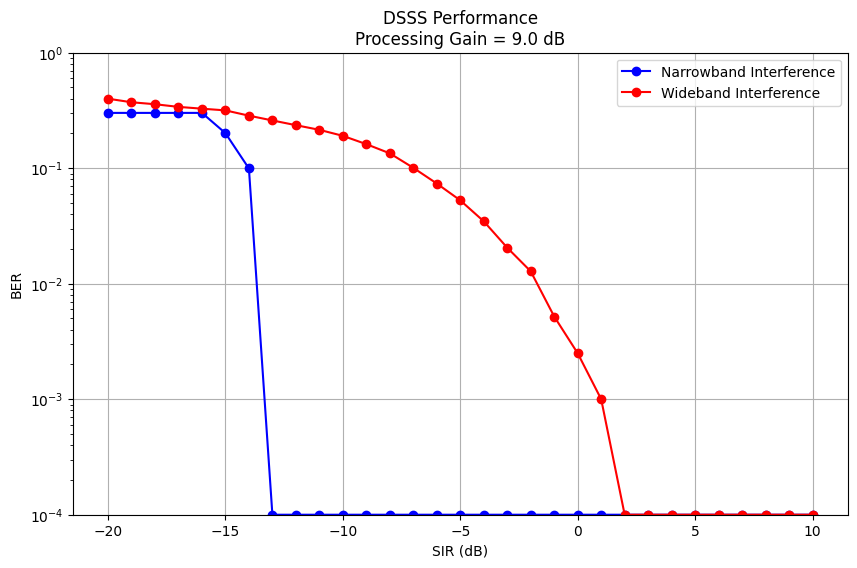

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class DSSSSystem:
    def __init__(self, n_bits=10000, chips_per_bit=8):
        self.n_bits = n_bits
        self.chips_per_bit = chips_per_bit
        self.pn_sequence = np.random.choice([1, -1], chips_per_bit)

    def transmit_receive(self, data, interference_type, SIR_dB):
        spread_signal = np.zeros(len(data) * self.chips_per_bit)
        for i in range(len(data)):
            spread_signal[i*self.chips_per_bit:(i+1)*self.chips_per_bit] = data[i] * self.pn_sequence

        t = np.arange(len(spread_signal))
        SIR = 10**(SIR_dB/10)

        if interference_type == 'narrow':
            interference = np.sin(2 * np.pi * 0.1 * t) / np.sqrt(SIR)
        else:
            interference = np.random.normal(0, 1/np.sqrt(SIR), len(spread_signal))

        received_signal = spread_signal + interference

        despread_signal = np.zeros(self.n_bits)
        for i in range(self.n_bits):
            chip_segment = received_signal[i*self.chips_per_bit:(i+1)*self.chips_per_bit]
            despread_signal[i] = np.sum(chip_segment * self.pn_sequence) / self.chips_per_bit

        return np.sign(despread_signal)

def simulate_interference_comparison():
    dsss = DSSSSystem()
    SIR_dB_range = np.arange(-20, 11, 1)  # Extended range
    data = np.random.choice([1, -1], dsss.n_bits)

    ber_narrow = []
    ber_wide = []

    for SIR_dB in SIR_dB_range:
        recovered_narrow = dsss.transmit_receive(data, 'narrow', SIR_dB)
        errors_narrow = np.sum(data != recovered_narrow)
        ber_narrow.append(max(errors_narrow/dsss.n_bits, 1e-4))  # Floor for visibility

        recovered_wide = dsss.transmit_receive(data, 'wide', SIR_dB)
        errors_wide = np.sum(data != recovered_wide)
        ber_wide.append(max(errors_wide/dsss.n_bits, 1e-4))

    plt.figure(figsize=(10, 6))
    plt.semilogy(SIR_dB_range, ber_narrow, 'b-o', label='Narrowband Interference')
    plt.semilogy(SIR_dB_range, ber_wide, 'r-o', label='Wideband Interference')
    plt.grid(True)
    plt.xlabel('SIR (dB)')
    plt.ylabel('BER')
    plt.title(f'DSSS Performance\nProcessing Gain = {10*np.log10(dsss.chips_per_bit):.1f} dB')
    plt.legend()
    plt.ylim(1e-4, 1)
    plt.show()

simulate_interference_comparison()